In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf
import pandas as pd
import cartopy as cart
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from sklearn.linear_model import LinearRegression
import numpy as np
from shapely import geometry
import scipy.stats
from matplotlib.offsetbox import AnchoredText

In [5]:
df = xr.open_dataset("./Data/future_a_india.nc")
df

<xarray.Dataset>
Dimensions:    (time: 86, bnds: 2, lon: 32, lat: 35)
Coordinates:
  * time       (time) object 2015-07-02 00:00:00 ... 2100-07-02 00:00:00
  * lon        (lon) float64 60.62 61.88 63.13 64.38 ... 95.62 96.88 98.12 99.38
  * lat        (lat) float64 5.5 6.5 7.5 8.5 9.5 ... 35.5 36.5 37.5 38.5 39.5
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    txnETCCDI  (time, lat, lon) float32 ...
Attributes: (12/55)
    CDI:                      Climate Data Interface version 1.9.3 (http://mp...
    history:                  Fri Apr 14 03:46:29 2023: cdo sellonlatbox,60,1...
    source:                   GFDL-CM4 (2018): \naerosol: interactive\natmos:...
    institution:              National Oceanic and Atmospheric Administration...
    Conventions:              CF-1.7 CMIP-6.0 UGRID-1.0
    external_variables:       areacella
    ...                       ...
    ETCCDI_software:          climdex.pcic
    ETCCDI_software_version:  1.1.9.1
    frequency:                yr
    creation_date:            2019-07-06T08:31:12Z
    title:                    ETCCDI indices computed on NOAA GFDL GFDL-CM4 m...
    CDO:                      Climate Data Operators version 1.9.4rc1 (http:/...

In [6]:
df = df.txnETCCDI
df

<xarray.DataArray 'txnETCCDI' (time: 86, lat: 35, lon: 32)>
array([[[ 25.033045,  25.533442, ...,  24.257654,  24.428125],
        [ 24.754389,  24.867853, ...,  25.284876,  24.932764],
        ...,
        [ -2.141791,  -2.068915, ..., -26.00385 , -20.01824 ],
        [ -2.774024,  -2.151099, ..., -16.193853, -14.194525]],

       [[ 25.741297,  25.250757, ...,  25.123652,  24.902063],
        [ 25.295862,  25.601343, ...,  25.489649,  24.338037],
        ...,
        [ -5.753912,  -6.733649, ..., -28.84664 , -23.834631],
        [ -8.176825,  -9.028265, ..., -21.092916, -17.873587]],

       ...,

       [[ 28.228235,  29.236383, ...,  27.577234,  27.621271],
        [ 29.231043,  29.375086, ...,  28.69021 ,  27.417994],
        ...,
        [ -2.610419,  -3.062506, ..., -17.60816 , -13.689672],
        [ -3.797614,  -3.812964, ..., -12.370672,  -9.326117]],

       [[ 28.509424,  28.709192, ...,  28.137781,  28.31994 ],
        [ 28.385828,  28.33822 , ...,  28.96728 ,  28.583887],
        ...,
        [ -0.660223,  -1.317511, ..., -21.125097, -16.708685],
        [ -3.188269,  -3.249915, ..., -15.237524, -13.072973]]], dtype=float32)
Coordinates:
  * time     (time) object 2015-07-02 00:00:00 ... 2100-07-02 00:00:00
  * lon      (lon) float64 60.62 61.88 63.13 64.38 ... 95.62 96.88 98.12 99.38
  * lat      (lat) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 35.5 36.5 37.5 38.5 39.5
    height   float64 9.969e+36
Attributes:
    long_name:      Annual Minimum of Daily Maximum Temperature
    units:          degrees_C
    cell_methods:   area: mean time: maximum
    cell_measures:  area: areacella
    interp_method:  conserve_order2
    original_name:  tasmax
    history:        Created by climdex.pcic 1.1.9.1 on Sat Jul  6 10:31:12 2019

In [7]:
df = np.mean(df,axis=(1,2))
df

<xarray.DataArray 'txnETCCDI' (time: 86)>
array([ 8.762933 ,  8.346741 ,  9.100755 ,  9.998774 ,  9.767802 ,
        9.593381 ,  9.814192 ,  8.8770275,  9.599222 ,  9.914299 ,
        9.155508 ,  8.858273 ,  9.252376 ,  9.154434 ,  8.989498 ,
        7.666141 ,  9.316963 ,  9.590702 ,  9.972873 ,  8.5568285,
       10.5829315,  8.975811 , 10.413425 ,  9.998529 , 10.597925 ,
       10.815647 ,  9.856192 , 10.373453 , 10.293873 , 10.03608  ,
       10.109109 , 10.05586  , 10.540624 ,  9.813309 , 10.837398 ,
       10.669204 , 10.134445 , 10.481073 ,  9.983894 , 10.274367 ,
       10.729432 , 11.268201 , 11.458552 , 11.221623 , 12.00326  ,
       11.13727  , 11.156797 , 11.67666  , 11.340694 ,  9.846146 ,
       11.801085 , 12.74152  , 11.396084 , 13.683208 , 12.748908 ,
       12.398975 , 12.2850275, 12.51287  , 11.622297 , 12.0152   ,
       12.510635 , 12.294743 , 12.406926 , 11.524825 , 13.299485 ,
       12.842046 , 12.287188 , 12.805984 , 11.737261 , 13.194759 ,
       13.6207695, 12.891835 , 13.285811 , 13.787328 , 13.977127 ,
       14.488416 , 13.731383 , 12.487924 , 14.025945 , 13.853954 ,
       13.774544 , 14.649632 , 12.845945 , 14.233426 , 14.445112 ,
       12.495349 ], dtype=float32)
Coordinates:
  * time     (time) object 2015-07-02 00:00:00 ... 2100-07-02 00:00:00
    height   float64 9.969e+36

In [4]:
year = []
for i in range (2015,2101):
    year.append(i)
winter_w = {'Time': year, 'VC': df.data}
win_w = pd.DataFrame(winter_w)

In [5]:
df.data

array([ 8.762933 ,  8.346741 ,  9.100755 ,  9.998774 ,  9.767802 ,
        9.593381 ,  9.814192 ,  8.8770275,  9.599222 ,  9.914299 ,
        9.155508 ,  8.858273 ,  9.252376 ,  9.154434 ,  8.989498 ,
        7.666141 ,  9.316963 ,  9.590702 ,  9.972873 ,  8.5568285,
       10.5829315,  8.975811 , 10.413425 ,  9.998529 , 10.597925 ,
       10.815647 ,  9.856192 , 10.373453 , 10.293873 , 10.03608  ,
       10.109109 , 10.05586  , 10.540624 ,  9.813309 , 10.837398 ,
       10.669204 , 10.134445 , 10.481073 ,  9.983894 , 10.274367 ,
       10.729432 , 11.268201 , 11.458552 , 11.221623 , 12.00326  ,
       11.13727  , 11.156797 , 11.67666  , 11.340694 ,  9.846146 ,
       11.801085 , 12.74152  , 11.396084 , 13.683208 , 12.748908 ,
       12.398975 , 12.2850275, 12.51287  , 11.622297 , 12.0152   ,
       12.510635 , 12.294743 , 12.406926 , 11.524825 , 13.299485 ,
       12.842046 , 12.287188 , 12.805984 , 11.737261 , 13.194759 ,
       13.6207695, 12.891835 , 13.285811 , 13.787328 , 13.9771

In [24]:
resultww = scipy.stats.linregress(win_w['Time'],win_w['VC'])

In [26]:
fitww = win_w['Time'] * resultww[0] + resultww[1]

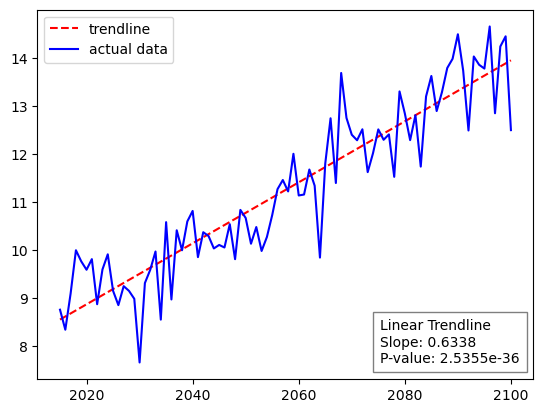

In [2]:
df = xr.open_dataset("./Data/future_a_india.nc")
df = df.txnETCCDI
df = np.mean(df,axis=(1,2))

year = []
for i in range (2015,2101):
    year.append(i)
winter_w = {'Time': year, 'VC': df.data}
win_w = pd.DataFrame(winter_w)

resultww = scipy.stats.linregress(win_w['Time'],win_w['VC'])
fitww = win_w['Time'] * resultww[0] + resultww[1]

plt.plot(year,fitww,'r--',label='trendline')
plt.plot(year,df,'b',label='actual data')
#text_box = AnchoredText('slope = ' + str(np.round(resultww[0],3)) + '\n' + 'P-value = ' + str(resultww[3]), frameon=True, loc=4, pad=0.5)
text_box = AnchoredText(f'Linear Trendline\nSlope: {resultww[0]*10:.4f}\nP-value: {resultww[3]:.4e}', frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', alpha=0.5)
plt.gca().add_artist(text_box)
plt.legend()